In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anitohdz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def get_cloud(text,title):
    stwords = set(nltk.corpus.stopwords.words('spanish'))
    word_cloud = WordCloud(width=4000,
                           height=4000,
                           colormap='PuRd',
                           margin=0,
                           max_words=100, 
                           stopwords=stwords,
                           background_color="white").generate(text)


    plt.figure(figsize=(12, 12))
    plt.imshow(word_cloud, interpolation='gaussian')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Raw Data

In [5]:
#Adding column names
data.rename(columns = {0:'iD', 1:'name', 2: 'extra_data', 3:'n_reviews', 4:'ranking', 5:'address'}, inplace = True)

In [6]:
data.head()

iD                                 name  \
0  23014476  Ruby Joy's Delivery Only Restaurant   
1    729175                       La Vie en Rose   
2   2052606                           Santo Cafe   
3    866744                         La Capellina   
4    198617                La Trattoria de Elena   

                                          extra_data  n_reviews  ranking  \
0  ['$119 - $298', 'Contemporánea, Saludable, Int...          2        5   
1  ['$45 - $300', 'Francesa, Café, Europea', 'Apt...          3        4   
2  ['$75 - $250', 'Mexicana, Café', 'Apto para ve...          3        4   
3  ['$199 - $398', 'Italiana, Pizzería, Fusión', ...          5        4   
4  ['Italiana, Europea', 'Apto para vegetarianos,...          5        4   

                                             address  
0  Delivery Only, San Miguel de Allende 37796 México  
1          Cantarranas # 18, Guanajuato 36000 México  
2               Campanero 4, Guanajuato 36000 México  
3    Sopena # 3 Col. Centro, Guanajuato 36000 México  
4  Calle Jardin de La Union No. 1, Guanajuato 360...

# Preprocessing Data

As a starting point in our analysis we are gonna clean and re-structure the retrivied data. In the beginning we normalize the text given for the names, doing so by case folding restaurant's names.

In [7]:
data['name']=data['name'].map(lambda x: x.lower())

In [8]:
data.head()

iD                                 name  \
0  23014476  ruby joy's delivery only restaurant   
1    729175                       la vie en rose   
2   2052606                           santo cafe   
3    866744                         la capellina   
4    198617                la trattoria de elena   

                                          extra_data  n_reviews  ranking  \
0  ['$119 - $298', 'Contemporánea, Saludable, Int...          2        5   
1  ['$45 - $300', 'Francesa, Café, Europea', 'Apt...          3        4   
2  ['$75 - $250', 'Mexicana, Café', 'Apto para ve...          3        4   
3  ['$199 - $398', 'Italiana, Pizzería, Fusión', ...          5        4   
4  ['Italiana, Europea', 'Apto para vegetarianos,...          5        4   

                                             address  
0  Delivery Only, San Miguel de Allende 37796 México  
1          Cantarranas # 18, Guanajuato 36000 México  
2               Campanero 4, Guanajuato 36000 México  
3    Sopena # 3 Col. Centro, Guanajuato 36000 México  
4  Calle Jardin de La Union No. 1, Guanajuato 360...

Now we treat the extra_data, in this case, we found that although an interesting case was to study the price range, the type of food they serve (whether it was Mexican, European, etc), unfortunately not all restaurants reported such nice data, and a more careful analysis could be done for feature work. Instead, we merge the type of food they serve and remove the price range. 

In [9]:
#The data in extra_data colum is of the form 'list', to extract the list we have
data['extra_data']=data['extra_data'].map(lambda x: eval(x))

In [10]:
#Example
data['extra_data'][0]

['$119 - $298',
 'Contemporánea, Saludable, Internacional, Delicatessen, Fusión',
 'Almuerzo, Cena']

In [11]:
food_type=[]
for x in data['extra_data']:
    if len(x)>1:
        if bool(re.search('$',x[0])): #Remove the price range
            if len(x[1:])>1:
                food_type =food_type + x[1:]
    else:
             food_type=food_type+x

In [12]:
# we concatenate all the text data in each row
text=' '.join( txt for txt in food_type)

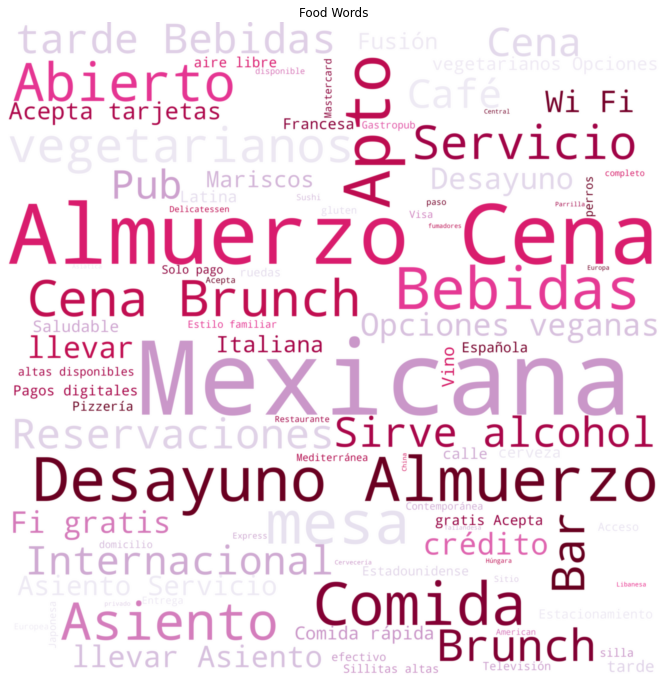

In [13]:
get_cloud(text,'Food Words')

Notice that they all have an option to have every meal of the day (Breakfast, Lunch, Dinner). On the other hand, it is interesting to see that theres not an international type food that stands out, besides the italian and spanish cousine, but very little. This might be because they sell themselves as international type of restaurant, where food of different nationalities are served, but mainly mexican, instead of specifying.

We then replace the 'extra_data' with all the food-tags we found.

In [14]:
def get_food_tags(x):
    if len(x)>1:
        if bool(re.search('$',x[0])): #Remove the price range
            if len(x[1:])>1:
                return x[1:]
            else: return x[1:]
    else:
            return x

In [15]:
data['extra_data']=data['extra_data'].map(lambda x: get_food_tags(x))

In [16]:
data.head()

iD                                 name  \
0  23014476  ruby joy's delivery only restaurant   
1    729175                       la vie en rose   
2   2052606                           santo cafe   
3    866744                         la capellina   
4    198617                la trattoria de elena   

                                          extra_data  n_reviews  ranking  \
0  [Contemporánea, Saludable, Internacional, Deli...          2        5   
1  [Francesa, Café, Europea, Apto para vegetarian...          3        4   
2  [Mexicana, Café, Apto para vegetarianos, Opcio...          3        4   
3  [Italiana, Pizzería, Fusión, Apto para vegetar...          5        4   
4  [Apto para vegetarianos, Opciones veganas, Alm...          5        4   

                                             address  
0  Delivery Only, San Miguel de Allende 37796 México  
1          Cantarranas # 18, Guanajuato 36000 México  
2               Campanero 4, Guanajuato 36000 México  
3    Sopena # 3 Col. Centro, Guanajuato 36000 México  
4  Calle Jardin de La Union No. 1, Guanajuato 360...

We now turn to the problem of finding latitude and longitude for each restaurant. This could have been done in the scrapping process but we got some findings, such as: some restaurants do not show explicitly their addrees instead they rely on Google maps location links, so that they can be easily found with the app to say. However, we could have used the Google maps API but a license was requiered.

Hence for latitude and longitude, given each restaurant's address, we make use of the library geocode, using the zip code we are able to find the requirement, however this only works for certain zip codes (if given...), to fill in such missing values we'll make use of another library which takes as an input the address (string), again it has its limitations, so rather we choose to use the closest region, say, the city, and get its latitude and longitude.

In [17]:
import pgeocode
from geopy.geocoders import Nominatim

Example

In [18]:
nomi = pgeocode.Nominatim('Mx')
np.array(nomi.query_postal_code('36020')[['latitude','longitude']])

array([21.0422, -101.25156666666668], dtype=object)

In [19]:
app = Nominatim(user_agent="test")
app.geocode('Guanajuato México')[-1]

(20.9876996, -101.0)

In [20]:
data['address']=data['address'].map(lambda x: 
          list(nomi.query_postal_code( x.split(' ')[-2] )[['latitude','longitude']])
          if  bool(re.search( r'[1-9]', x.split(' ')[-2]  )) and not np.isnan(list(nomi.query_postal_code( x.split(' ')[-2] )[['latitude','longitude']])).any() 
                 else  app.geocode(x.split(',')[-1])[-1])

The nearest region to locate each restaurant was Gto, Mex, to be more specific, and retrieve a more particular region it would take time. Hence, the places that could not be found, have the lat and long above.

In [21]:
#Add two columns: latitude and longitude instead of a single column
data[['latitude','longitude']]=pd.DataFrame(data['address'].to_list(), columns=['latitude', 'longitude'])

In [22]:
#We delete the address column
data.drop('address', inplace=True, axis=1)

In [23]:
data.head()

iD                                 name  \
0  23014476  ruby joy's delivery only restaurant   
1    729175                       la vie en rose   
2   2052606                           santo cafe   
3    866744                         la capellina   
4    198617                la trattoria de elena   

                                          extra_data  n_reviews  ranking  \
0  [Contemporánea, Saludable, Internacional, Deli...          2        5   
1  [Francesa, Café, Europea, Apto para vegetarian...          3        4   
2  [Mexicana, Café, Apto para vegetarianos, Opcio...          3        4   
3  [Italiana, Pizzería, Fusión, Apto para vegetar...          5        4   
4  [Apto para vegetarianos, Opciones veganas, Alm...          5        4   

   latitude  longitude  
0   20.9252  -100.7378  
1   21.0177  -101.2493  
2   21.0177  -101.2493  
3   21.0177  -101.2493  
4   21.0177  -101.2493

We finally save the clean data

In [24]:
data.to_csv('./clea_restaurants.csv')  

# Data Analysis

Let us plot as an histogram the ranking and number of reviews columns

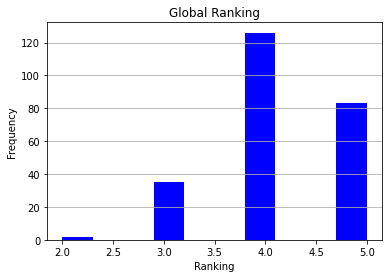

In [25]:
plt.hist(x=data['ranking'], bins='auto', color='b')
plt.grid(axis='y')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.title('Global Ranking')
plt.show()

We notice right away we have unbalanced data, where most of the restaurants are ranked with 4 stars, following 5. Although it is early to conjecture such phenomena since this do not represent all the restaurans in Gto.

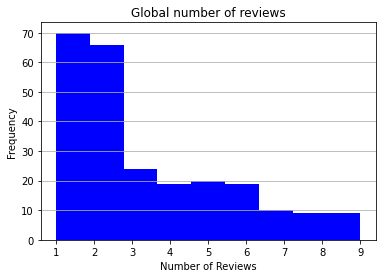

In [26]:
plt.hist(x=data['n_reviews'], bins='auto', color='b')
plt.grid(axis='y')
plt.xlabel('Number of Reviews')
plt.title('Global number of reviews')
plt.ylabel('Frequency')
plt.show()

In the case of number of reviews we identify that most of the resturants have only one, let us remark here that this may be as a consequence of not scrapping correctly the webpage,  which can be improved. 

# Geoplots

In [29]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

mex=gpd.read_file("mexican-states/mexican-states.shp")

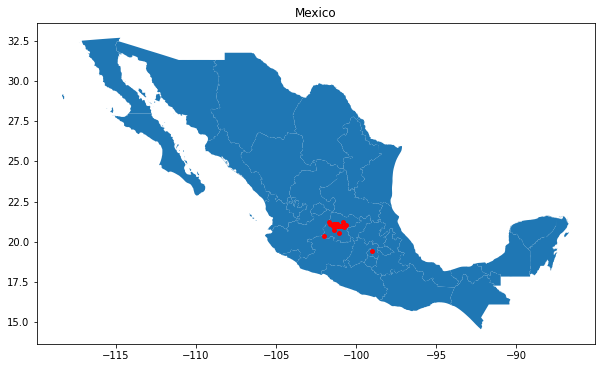

In [30]:
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   
fig,ax = plt.subplots(1,1,figsize=(10,8))
mex.plot(ax=ax)
plt.title('Mexico')
gdf.plot(ax=ax, marker='o', color='red', markersize=15);

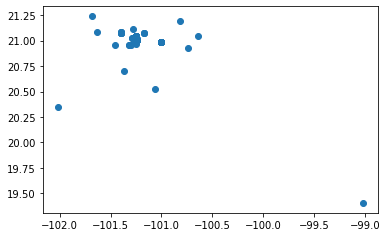

In [31]:
#closer look at the location of restaurants
geo_df = GeoDataFrame(data,geometry=geometry)
geo_df.plot()
plt.show()

Looking closely we'll see that most of the restaurants are in fact closer to or in downtowon, again this may be biased because of the way they were scrapped. If we take a look at the ids, the point far from the others refers to a restaurant in Silao, while the rest are actually from downtown Gto. See the following plotting.

In [32]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(data,lat='latitude',lon='longitude', text='iD')
fig.show()

In [33]:
#'outlier' Ponchos restaurant is in Silao
data[data['iD']==13196418]

iD                   name  extra_data  n_reviews  ranking  \
192  13196418  poncho's restaurantes  [Mexicana]          1        5   

     latitude  longitude                    geometry  
192   19.3999   -99.0232  POINT (-99.02320 19.39990)

We now come back to a more in depth study of ranking and number of reviwes

In [34]:
data[['ranking','n_reviews']].describe()

ranking   n_reviews
count  246.000000  246.000000
mean     4.178862    3.199187
std      0.694380    2.316965
min      2.000000    1.000000
25%      4.000000    1.000000
50%      4.000000    2.000000
75%      5.000000    5.000000
max      5.000000    9.000000

In terms of ranking and reviews, we have that while ranking has an average of 4 stars, meaning that the restaurants had some things to improve, one might think is somehow related to the average of reviews is, which is 3. However if we study this statistically by means of correlation we have

In [35]:
from scipy.stats import pearsonr #pearson correlation coefficient for linear dependecy
from scipy.stats import spearmanr #spearman correlation coefficient for nonlinear dependecy

In [36]:
#correlation matrix
np.cov(data['n_reviews'],data['ranking'])

array([[ 5.36832587, -0.07658868],
       [-0.07658868,  0.4821636 ]])

In [37]:
pearsonr(data['n_reviews'],data['ranking'])[0]

-0.047604495198598135

In [38]:
spearmanr(data['n_reviews'],data['ranking'])[0]

-0.11598141493781551

As noted by the statistics above, they may not be related, and there is no evidence of the opposite too. In that case we are gona use them both in a simpler manner, let's do an average of these two and we are gonna set the top 10 restaurants with the higher score.

In [39]:
pd_aux=pd.DataFrame(zip(data['iD'],data['n_reviews']/2+data['ranking']/2),columns=['id','score'])
pd_aux.sort_values('score', ascending=False).head()

id  score
85     873132    7.0
45   23715505    7.0
49   23445451    7.0
63   12532557    7.0
113   7983097    6.5

In [40]:
top_10=list(pd_aux.sort_values('score', ascending=False)['id'])[:10]

In [41]:
#top 10 restaurants
data[data['iD'].isin(top_10)]

iD                          name  \
26    7654484                      escarola   
45   23715505       pali gastronomía & arte   
49   23445451            nigromante roftoop   
54   23305452                     le bistro   
55   24000239                black mamba 61   
62   15185086                     mucho pan   
63   12532557                    la calleja   
64   23447107   jacarandas restaurant - bar   
85     873132              guanajuato wings   
113   7983097  las fabulosas papas irapuato   

                                            extra_data  n_reviews  ranking  \
26   [Apto para vegetarianos, Opciones veganas, Opc...          9        4   
45                          [Desayuno, Almuerzo, Cena]          9        5   
49                                     [Reservaciones]          9        5   
54   [Francesa, Mediterránea, Bar de vinos, Desayun...          8        5   
55                                    [Almuerzo, Cena]          8        5   
62   [Almuerzo, Bebidas, Comida para llevar, Estaci...          8        5   
63                [Bar, Mariscos, Pub, Almuerzo, Cena]          9        5   
64                          [Desayuno, Almuerzo, Cena]          8        5   
85   [Cena, Entrega a domicilio, Comida para llevar...          9        5   
113                                    [Reservaciones]          9        4   

     latitude   longitude                     geometry  
26    21.0177 -101.249300  POINT (-101.24930 21.01770)  
45    21.0177 -101.249300  POINT (-101.24930 21.01770)  
49    21.0177 -101.249300  POINT (-101.24930 21.01770)  
54    21.0177 -101.249300  POINT (-101.24930 21.01770)  
55    21.0177 -101.249300  POINT (-101.24930 21.01770)  
62    21.0177 -101.249300  POINT (-101.24930 21.01770)  
63    20.9750 -101.272300  POINT (-101.27230 20.97500)  
64    21.0184 -101.240467  POINT (-101.24047 21.01840)  
85    21.0177 -101.249300  POINT (-101.24930 21.01770)  
113   20.9877 -101.000000  POINT (-101.00000 20.98770)

# Reviews 

We finally work with the scrapped reviews, particularly of these top 10 restaurants.

In [42]:
data_rev=pd.read_csv(r'/home/anitohdz/Documents/Trabajo/restaurants_rev.csv',header=None, skiprows=1, sep=',',encoding='utf-8', engine ="python" )

In [43]:
data_rev.rename(columns = {0:'iD', 1:'name', 2: 'reviews' }, inplace = True)
data_rev.head()

iD                                 name  \
0  23014476  Ruby Joy's Delivery Only Restaurant   
1    729175                       La Vie en Rose   
2   2052606                           Santo Cafe   
3    866744                         La Capellina   
4    198617                La Trattoria de Elena   

                                             reviews  
0  Unique menu and weekly specials. I recommend t...  
1  Me lo recomendaron mucho. Pero pésimo café, po...  
2  Estudié en Gto, y siempre que tengo la oportun...  
3  Este lugar es muy especial para mi, pues aquí ...  
4  Muy ricas cortes y pizzas. Bien como siempre y...

In [44]:
rev_top_10=data_rev[data_rev['iD'].isin(top_10)]
rev_top_10

iD                     name  \
26   7654484                 Escarola   
45  23715505  Pali Gastronomía & Arte   
49  23445451       Nigromante Roftoop   

                                              reviews  
26  Exquisito restaurante vegano. Muy rica la comi...  
45  En las varias visitas que eh dado al lugar no ...  
49  Excelente local. Linda vista de la ciudad, exc...

Unfortunately beacuse of time we could not scrapped the iDs for the top 10. Nonetheless Let's do some wordclouds on each restaurant's reviews.

In [45]:
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

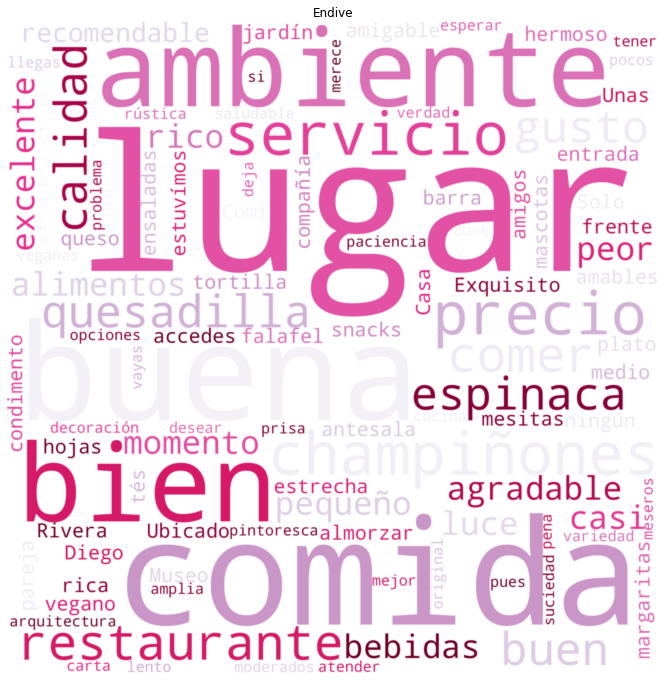

In [46]:
get_cloud(remove_emojis(rev_top_10['reviews'][26]),'Endive')

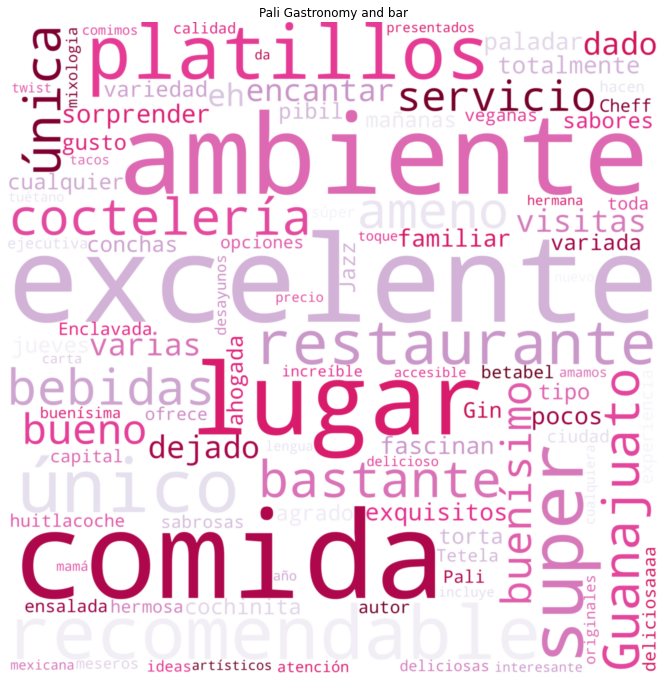

In [47]:
get_cloud(remove_emojis(rev_top_10['reviews'][45]),'Pali Gastronomy and bar')

On the other hand, if we get the ones with least 10 scores.

In [48]:
least_10=list(pd_aux.sort_values('score')['id'])[:10]

In [49]:
data[data['iD'].isin(least_10)]

iD                                    name  \
21    2098278                                 truco 7   
65    4216747                         peccato di gola   
186   7239493                 red fish sushi & nikkei   
236  10793388                       la clandestina 29   
237  12786881                        panal noria alta   
240    232868  restaurante bar tradiciones panoramico   
242   3512562                   el cerro de las ranas   
243   6890289                    la oreja de van gogh   
244   8029203                         lucky irish pub   
245   8454959                           los equipales   

                                            extra_data  n_reviews  ranking  \
21          [Mexicana, Latina, Apto para vegetarianos]          1        3   
65                      [Apto para vegetarianos, Cena]          1        4   
186                                          [Asiento]          1        3   
236  [Mexicana, Bar, Pub, Brunch, Abierto hasta tar...          1        3   
237  [Italiana, Bar, Pizzería, Café, Internacional,...          1        3   
240                                    [Internacional]          1        2   
242  [Asientos al aire libre, Asiento, Acceso para ...          1        3   
243  [Asientos al aire libre, Asiento, Sirve alcoho...          1        3   
244                                              [Pub]          2        2   
245                  [Cena, Asiento, Servicio de mesa]          1        3   

     latitude  longitude                     geometry  
21    21.0177  -101.2493  POINT (-101.24930 21.01770)  
65    20.9877  -101.0000  POINT (-101.00000 20.98770)  
186   21.0177  -101.2493  POINT (-101.24930 21.01770)  
236   21.0177  -101.2493  POINT (-101.24930 21.01770)  
237   21.0133  -101.2697  POINT (-101.26970 21.01330)  
240   20.9877  -101.0000  POINT (-101.00000 20.98770)  
242   20.9877  -101.0000  POINT (-101.00000 20.98770)  
243   21.0177  -101.2493  POINT (-101.24930 21.01770)  
244   21.0177  -101.2493  POINT (-101.24930 21.01770)  
245   20.9877  -101.0000  POINT (-101.00000 20.98770)

From which we scrapped the reviews of

In [50]:
data_rev[data_rev['iD'].isin(least_10)]

iD     name                                            reviews
21  2098278  Truco 7  El servicio bastante tardado, la comida fría y...

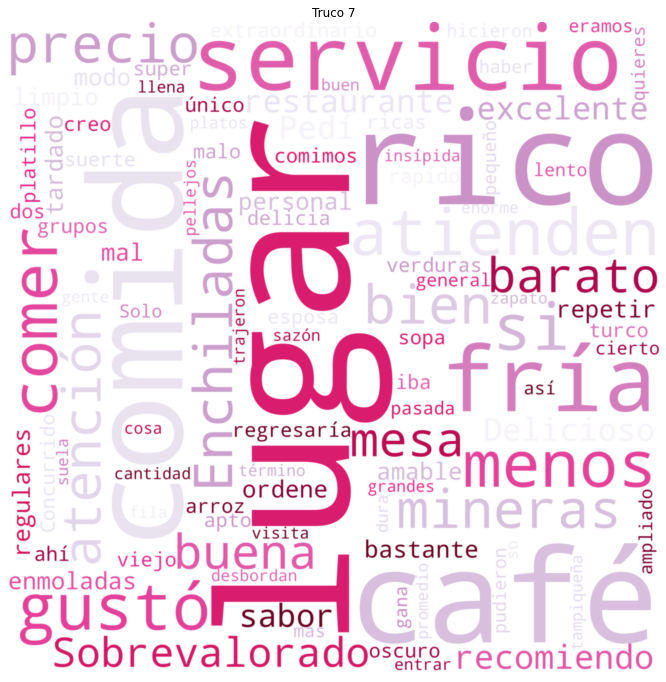

In [51]:
get_cloud(remove_emojis(data_rev['reviews'][21]),'Truco 7')

In light of the above, the two extremes are really clear, while in the top good food and service is a must, in least they usually complain about the opposite, saying even that the food was cold and expensive.

## Topic Modeling

To study the reviews in a more visual way we consider doing topic modeling via the use of the LDA (Latent Diriclet Allocation), 

In [52]:
import gensim
from gensim.utils import simple_preprocess

In [53]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
stop_words.update(["el",'en','la','lo','que','de','un','los','que','las'])
def sent_to_words(reviews):
    for rev in reviews:
        yield(gensim.utils.simple_preprocess(str(rev), deacc=True))
        
def remove_stopwords(reviews):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for rev in reviews]

In [54]:
data_rev['reviews']=data_rev['reviews'].map(lambda x: remove_emojis(x))

In [55]:
text=data_rev['reviews'].tolist()
text=[txt.lower() for txt in text]

In [56]:
data_words = list(sent_to_words(text))

In [57]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [58]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
# Print the Keyword in the 10 topics
doc_lda = lda_model[corpus]

In [59]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/home/anitohdz/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning:

the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses

/home/anitohdz/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/home/anitohdz/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/anitohdz/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/anitohdz/.l

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.010634  0.001718       1        1  91.722375
3     -0.000982 -0.004946       2        1   5.583836
2      0.002867  0.000309       3        1   2.206715
0      0.004229  0.002277       4        1   0.421086
1      0.004520  0.000642       5        1   0.065988, topic_info=      Term        Freq       Total Category  logprob  loglift
75      de  658.000000  658.000000  Default  30.0000  30.0000
129     la  541.000000  541.000000  Default  29.0000  29.0000
84      el  524.000000  524.000000  Default  28.0000  28.0000
152    muy  382.000000  382.000000  Default  27.0000  27.0000
92      es  337.000000  337.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
175    por    0.044555   86.980302   Topic5  -5.4491  -0.2533
199     se    0.043710   86.869881   Topic5  -5.4683  -0.2711
208    son    0.036986   71.024419   Topic5  -5.6353  -0.2368
50   buena    0.041310  107.397306   Topic5  -5.5247  -0.5397
276    del    0.037994   94.942247   Topic5  -5.6084  -0.5002

[368 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1867      1  0.589506      adornos
39        1  0.920852           al
39        2  0.040626           al
39        3  0.027084           al
0         1  0.830672          all
...     ...       ...          ...
2022      1  0.920727  volveriamos
31        1  0.783186          was
32        1  0.806605         week
33        1  0.820617       weekly
34        1  0.968392         with

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

## Feature Selection

In [60]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
cv = CountVectorizer(max_df=0.95, min_df=2, max_features=500, stop_words='english') #Longitud del diccionario es max_features
X_vec = cv.fit_transform(text)
Y=data[data['iD'].isin(data_rev['iD'])]['ranking']

In [62]:
res = dict(zip(cv.get_feature_names_out(), mutual_info_classif(X_vec, Y, discrete_features=True)))

In [63]:
import operator
dictionary = sorted(res.items(), key=operator.itemgetter(1), reverse=True)

In [64]:
words=list(res.keys())

In [65]:
def new_review(review, words):
    new_rev=[]
    for word in review.split(' '): 
        if word in words:
            new_rev.append(word)
    return ' '.join(wrd for wrd in new_rev)

In [66]:
data_rev['reviews']=data_rev['reviews'].map(lambda x: new_review(x, words))

In [67]:
text=data_rev['reviews'].tolist()
data_words = list(sent_to_words(text))
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [68]:
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
doc_lda = lda_model[corpus]

In [69]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/home/anitohdz/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/home/anitohdz/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/anitohdz/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/anitohdz/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import r

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.003171  0.0       1        1  66.991825
1     -0.003171  0.0       2        1  33.008175, topic_info=          Term        Freq       Total Category  logprob  loglift
38         las  113.000000  113.000000  Default  30.0000  30.0000
68         que  297.000000  297.000000  Default  29.0000  29.0000
63         por   75.000000   75.000000  Default  28.0000  28.0000
91         una  153.000000  153.000000  Default  27.0000  27.0000
41          lo  105.000000  105.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
154         si   11.669350   33.070464   Topic2  -5.1617   0.0667
131  excelente   15.612205   56.943329   Topic2  -4.8707  -0.1856
76         sin   12.651566   40.113687   Topic2  -5.0809  -0.0455
169       como   11.775752   35.165973   Topic2  -5.1527   0.0144
6         bien   12.483323   54.141420   Topic2  -5.0943  -0.3588

[163 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
236       1  0.816412   acogedor
236       2  0.204103   acogedor
159       1  0.762158  agradable
159       2  0.238175  agradable
2         1  0.676693         al
...     ...       ...        ...
351       2  0.261262  visitamos
158       1  0.643384      vista
158       2  0.363652      vista
279       1  0.833916       zona
279       2  0.208479       zona

[215 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In this second visualization method we notice then reviews are splitted in two main topics, in the first service and food is mainly the topic of interest while for the second observe that price no longer appears, and some tokens speaking of the appearence appear (say view, ambient). This implies that maybe a sentiment analysis on the reviews could be of interest, moreover a recommender system could also be use since we would like the client to have a better experience, or to avoid places not worthly. 

Let us remark that a finer study could have been done in this case, comparing the two plots above (LDA-plots) in the first we pass all the reviews through the algorthm finding 5 topics, but it wasn't so clear on what they were. Then we decided to enrich the text and consider a feature selection where the most relevant tokens are collected to filter out the reviews that contain such tokens. 